### Video Game Sales

As early as computers were being built, the creation of games on the computer soon followed. With the rapid popularity and interest of video games, the video game industry became a massive development. From 2D computer games to arcade machines to consoles and handheld gaming devices, the billion-dollar tech enterprise has allowed us to play and experience any immersive world of our choice over time. With over 50 years since the beginning of video games, we have seen multiple big named titles in every genre and some of us have probably even played a few, but what factors play into the highly profitable and enjoyable games?

This is what I aim to answer in my data dive, how do factors such as platform, genre, and publishers contribute to the global sales of a video game? By answering this research question, it can help with marketing strategies and where to aim our audience interest, which companies to publish with, and which platform to release on. It can also predict future sales by recognizing patterns and trends in the sales.

The dataset I will be using is based off video game sales up until 2016. It gives information on different big titled games, their genres, the year they were released, the platform they were released on, the publishers, the total regional sales, and the total global sales. It was generated by a scrape of vgchartz.com. 




I will be importing all the libraries I will need to dive into my dataset.

In [707]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sm_api
import seaborn as sns
import train_test_split
from sklearn.model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Now we will import and read our dataset and print out the columns.

In [ ]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In this dataset, we have 11 columns in totaL. Below I have provided a table with a small description of the variables we will be using from the dataset.

| Column Name      | Description |
| ----------- | ----------- |
| Dataset      |   https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019     |
| Rank   | Ranking of overall sales        |
| Name      | Name of the game       |
| Platform   | Platform of the game (PC, PS4, Xbox, etc.)      |
| Year      | Year of the game release       |
| Genre   | Genre of the game        |
| Publisher      | Publisher of the game       |
| NA_Sales   | Sales in North America (in millions)    |
| EU_Sales      | Sales in Europe (in millions)       |
| JP_Sales   | Sales in Japan (in millions)       |
| Other_Sales      | Sales in the rest of the world (in millions)   |
| Global_Sales   | Total worldwide sales (in millions)        |


For my data dive, I will be using the following for my *dependent* and *independent* variables.

***Dependent Variable***
- Global_Sales

***Independent Variables***
- Platform
- Genre
- Publisher

In [ ]:
(df.describe())

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Using our descriptive analysis, we can conclude that we have a total of 16,598 games in the dataset. Looking at the year column, we can see thay our data starts from 1980 all the way to 2020, and 50% of the games recorded in the dataset were released before 2008 and the other 50% after.

The mean of the sales across the regions are very different with NA_Sales at about $26.5 million, EU_Sales at $14.67 million, JP_Sales at $7.78 million, Other_Sales at $4.81 million, and Global_Sales at $5.37 million. The standard deviations are also very different which shows us that there is variability in the sales data meaning that some games have higher sales amounts than others. The maximum for Global_Sales is $82.74 million, which is a lot higher than the mean, meaning that there are outliers.

We can also see there are values missing by comparing the rank and year columns, so we can run a heatmap to visually show the holes in our dataset.

Text(0.5, 1.0, 'Missing values heatmap')

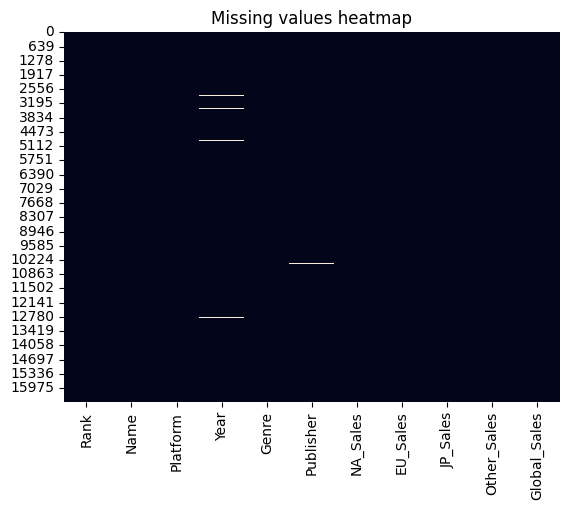

In [ ]:
df = pd.concat([df], ignore_index=True, sort =False)
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title('Missing values heatmap')

Looking at the heatmap, we can see we're missing values in the 'Year' and 'Publisher' columns.

### Global Sales per Year

Text(0.5, 1.0, 'Global Sales (in millions) per Year')

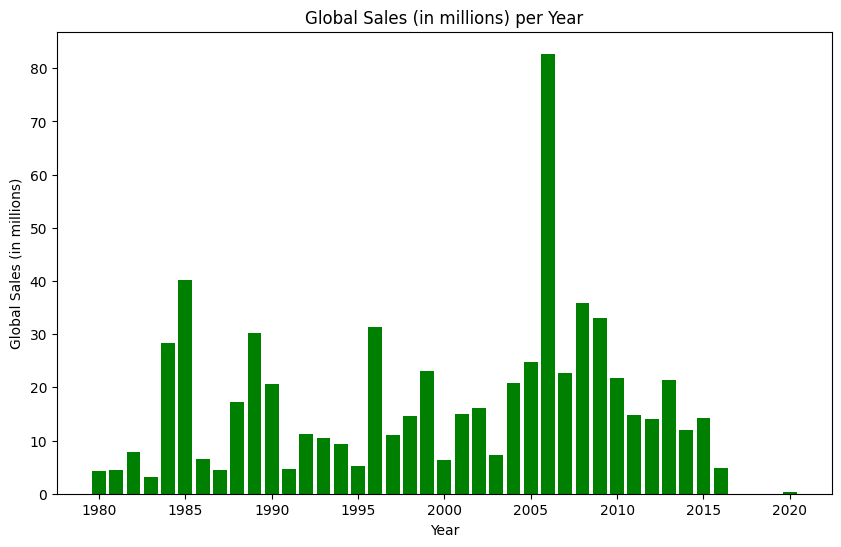

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df['Year'],df['Global_Sales'], color='green')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales (in millions) per Year')

We can see from the bar graph that game sales peaked in 2006 and started to slowly decline again right after which correlates with the start of mobile and digital download gaming.

Using the describe function, we can see what the categorical columns hold individually and the top 10 of each category.

In [ ]:
top_10_platforms = df['Platform'].value_counts().head(10)
print(top_10_platforms)
(df['Platform']).describe()


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64


count     16598
unique       31
top          DS
freq       2163
Name: Platform, dtype: object

In [ ]:
top_10_genre = df['Genre'].value_counts().head(10)
print(top_10_genre)
(df['Genre']).describe()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64


count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

In [ ]:
top_10_publishers = df['Publisher'].value_counts().head(10)
print(top_10_publishers)
(df['Publisher']).describe()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64


count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

Looking at our non-numerical columns analysis, we can see that the **DS** is the most frequent gaming 'Platform', in our dataset, showing up *2,163 times*. **Action** is the most frequent 'Genre' that shows up, showing up *3,316 times*, and **Electronic Arts** being the most frequent Publisher' in our dataset, showing up *1,351 times*.

I also ran the top 10 for each categorical column to use for our machine learning question later.

Now I will be comparing each categorical column to Global Sales

Text(0.5, 1.0, 'Global Sales (in millions) per Platform')

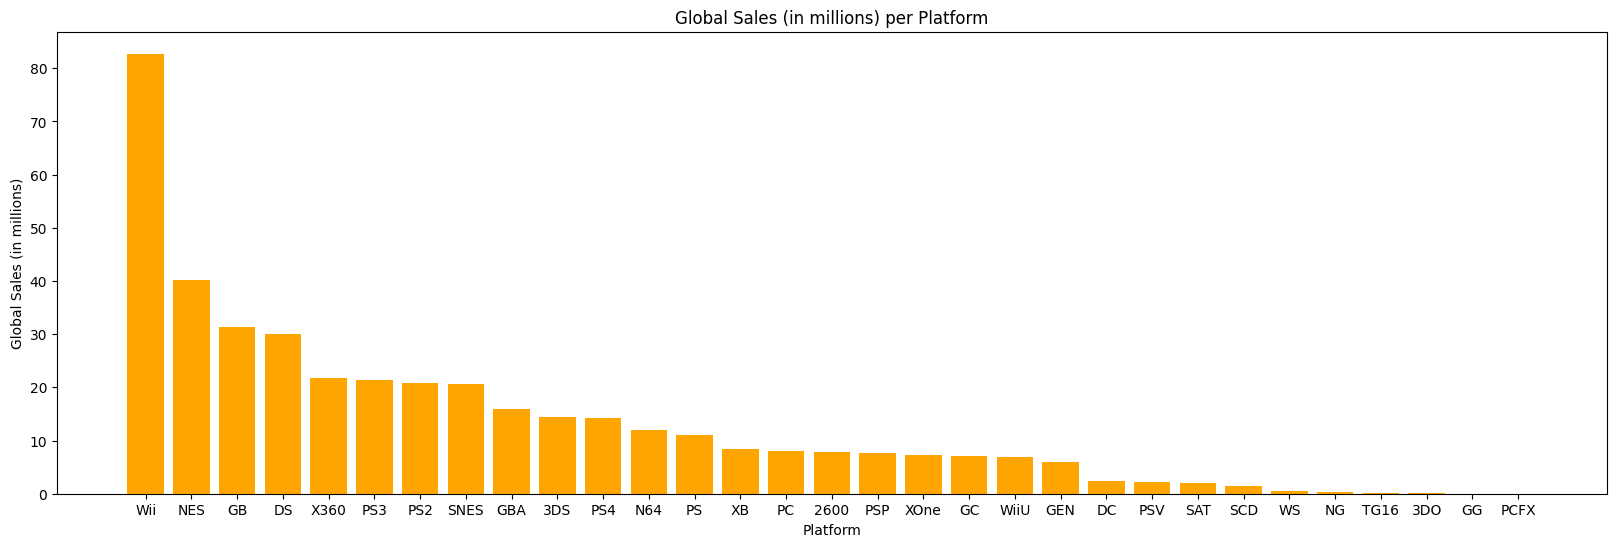

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(df['Platform'],df['Global_Sales'], color='orange')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales (in millions) per Platform')

Text(0.5, 1.0, 'Global Sales (in millions) per Genre')

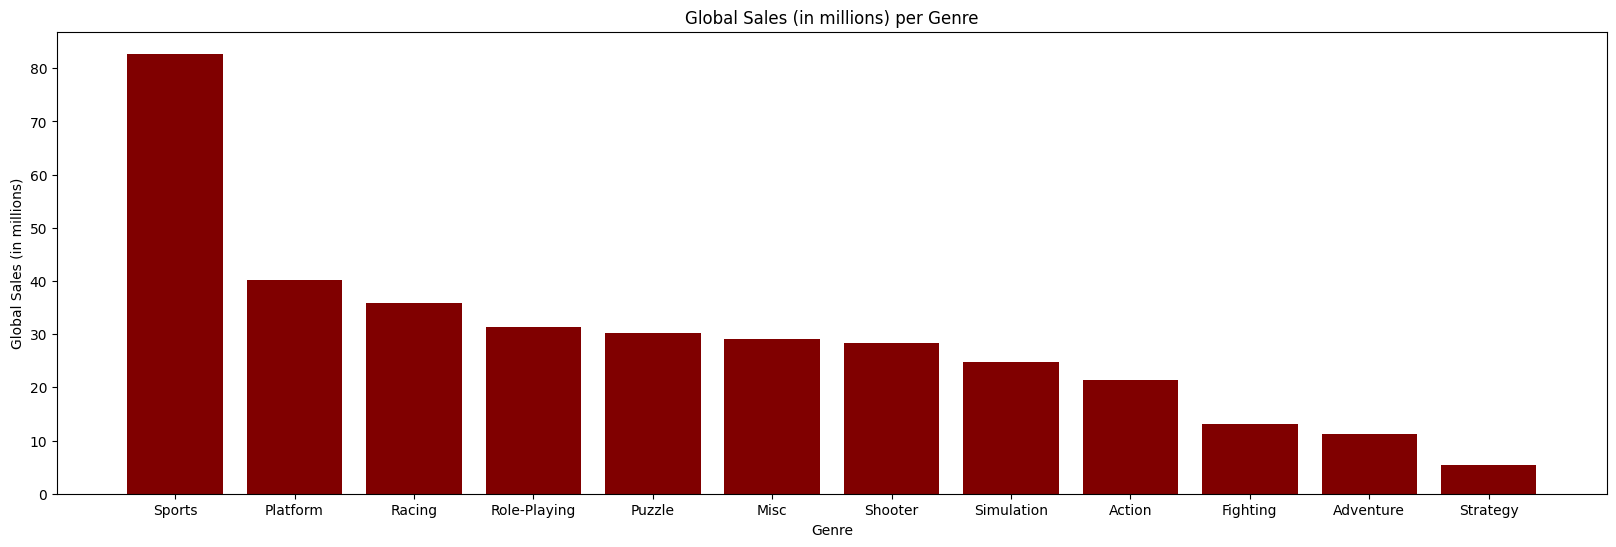

In [ ]:
plt.figure(figsize=(20,6))
plt.bar(df['Genre'],df['Global_Sales'], color='maroon')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales (in millions) per Genre')

We saw earlier that there were missing values in the *Publisher* column, and since we're using it for one of our dependent variables, we willbe filling in the missing data to ensure we don't run into any issues.

In [ ]:
df_publisher = df['Publisher'].value_counts(normalize=True)
df_publisher = df['Publisher'].fillna(df['Publisher'].mode()[0])
df['Publisher']

0          Nintendo
1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16598, dtype: object

Now that we have looked at what our dataset holds, we can run our OLS regression.

In [ ]:
predictors = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

y = df['Global_Sales']
x = df[predictors]

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.679e+08
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        22:44:47   Log-Likelihood:                 63671.
No. Observations:               16598   AIC:                        -1.273e+05
Df Residuals:                   16593   BIC:                        -1.273e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0003    4.3e-05      7.517      

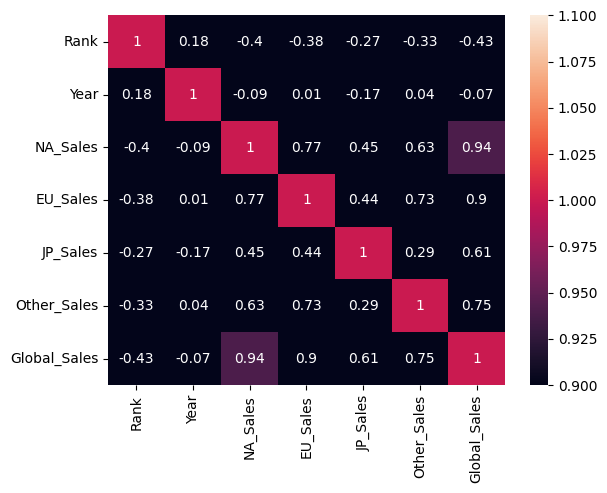

In [ ]:
corr_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=1)
plt.show()

                  sum_sq      df          F        PR(>F)
C(Platform)   102.194557     2.0  29.168107  2.496903e-13
Residual     9897.784103  5650.0        NaN           NaN


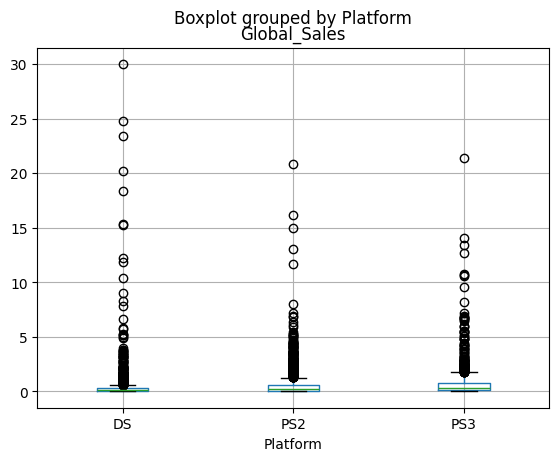

In [ ]:
top_platforms = ['DS','PS2','PS3']
df = df.query('Platform == @top_platforms')

df.boxplot(column='Global_Sales',by='Platform')
plt.show

model = sm_api.ols('Global_Sales ~ C(Platform)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F    PR(>F)
C(Genre)     10.329905     2.0  2.161399  0.115237
Residual  17678.509932  7398.0       NaN       NaN


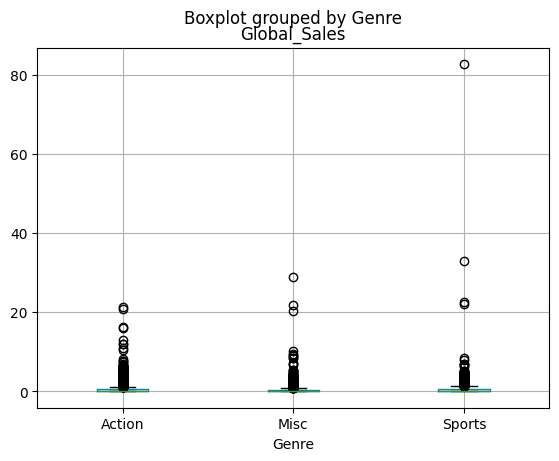

In [ ]:
top_genre = ['Action','Sports','Misc']
df = df.query('Genre == @top_genre')

df.boxplot(column='Global_Sales',by='Genre')
plt.show

model = sm_api.ols('Global_Sales ~ C(Genre)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

### Obtaining my own training and test data set

In [ ]:
independent_variables = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
X = df[independent_variables]
Y = df['Global_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

NameError: name 'train_test_split' is not defined